# 05 - Unsupervised Learning (K-Means & Hierarchical)

In [1]:
# Required Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score



heart_disease_selected = pd.read_csv(r"C:\Users\eyad0\Documents\python\Heart_Disease_Project\data\heart_disease_selected.csv")

x = heart_disease_selected.drop("num", axis=1)
y = heart_disease_selected["num"]

heart_disease_selected.head()

,thal_7.0,cp_4,exang,ca_2.0,ca_3.0,slope_2,cp_3,cp_2,oldpeak,ca_1.0,num
0,False,False,0,False,False,False,False,False,1.087338,False,0
1,False,True,1,False,True,True,False,False,0.397182,False,2
2,True,True,1,True,False,True,False,False,1.346147,False,1
3,False,False,0,False,False,False,True,False,2.122573,False,0
4,False,False,0,False,False,False,False,True,0.310912,False,0


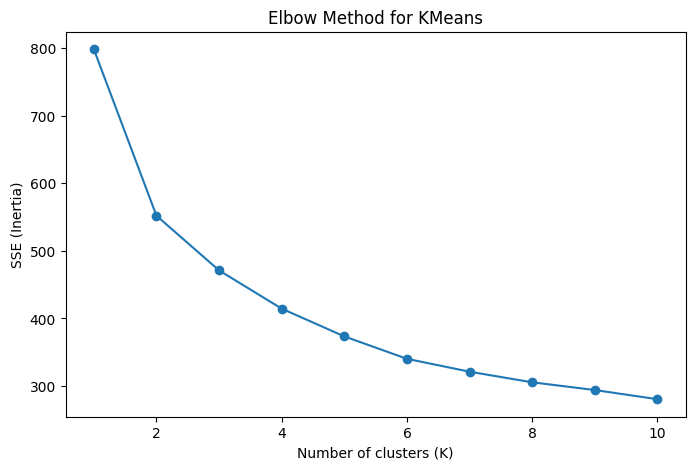


KMeans Cluster Counts:
3    77
1    71
0    64
2    56
4    35
Name: count, dtype: int64

KMeans Evaluation:
Adjusted Rand Index: 0.11937918388332049
Normalized Mutual Info: 0.17700579606157715


In [2]:
# K-Means with Elbow Method
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, sse, 'o-')
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for KMeans")
plt.show()

# K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(x)

print("\nKMeans Cluster Counts:")
print(pd.Series(clusters_kmeans).value_counts())

# Compare clusters with actual labels
ari = adjusted_rand_score(y, clusters_kmeans)
nmi = normalized_mutual_info_score(y, clusters_kmeans)

print("\nKMeans Evaluation:")
print("Adjusted Rand Index:", ari)
print("Normalized Mutual Info:", nmi)

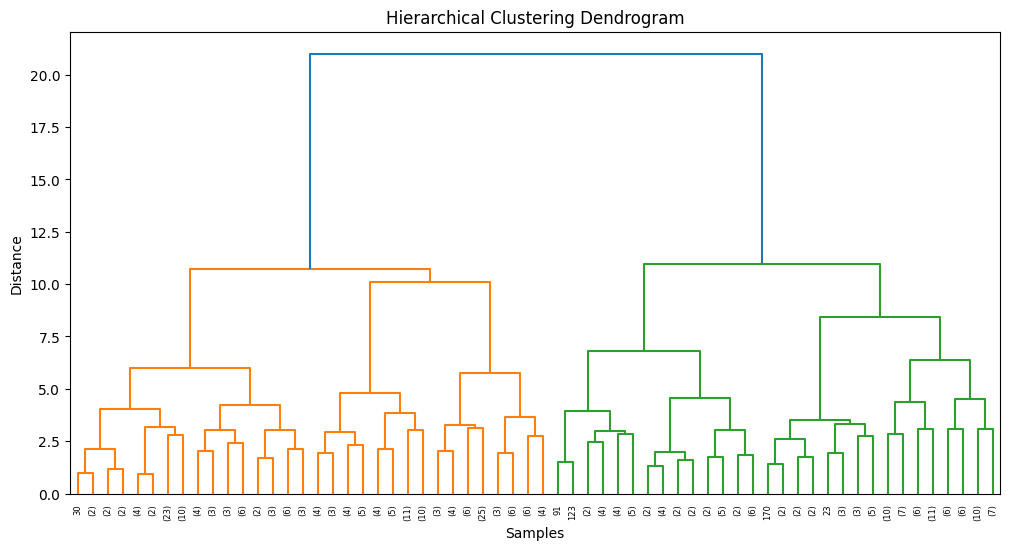

Hierarchical (K=2):
ARI: 0.20356110164447905
NMI: 0.1534467197174497

Hierarchical (K=5):
ARI: 0.11069923503111888
NMI: 0.1618771863826322


In [3]:
# ----------------------------
# 2) Hierarchical Clustering
# linkage matrix

linkage_matrix = linkage(x, method="ward")

# dendrogram
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# ----------------------------
# Cut dendrogram into clusters
# K=2
clusters_hier_2 = fcluster(linkage_matrix, 2, criterion="maxclust")
ari_2 = adjusted_rand_score(y, clusters_hier_2)
nmi_2 = normalized_mutual_info_score(y, clusters_hier_2)

print("Hierarchical (K=2):")
print("ARI:", ari_2)
print("NMI:", nmi_2)

# K=5
clusters_hier_5 = fcluster(linkage_matrix, 5, criterion="maxclust")
ari_5 = adjusted_rand_score(y, clusters_hier_5)
nmi_5 = normalized_mutual_info_score(y, clusters_hier_5)

print("\nHierarchical (K=5):")
print("ARI:", ari_5)
print("NMI:", nmi_5)


In [4]:
results = pd.DataFrame({
    "Method": ["KMeans (K=5)", "Hierarchical (K=2)", "Hierarchical (K=5)"],
    "ARI": [ari, ari_2, ari_5],
    "NMI": [nmi, nmi_2, nmi_5]
})

print("\n=== Comparison of Clusters with Actual Labels ===")
print(results)



=== Comparison of Clusters with Actual Labels ===
               Method       ARI       NMI
0        KMeans (K=5)  0.119379  0.177006
1  Hierarchical (K=2)  0.203561  0.153447
2  Hierarchical (K=5)  0.110699  0.161877
